In [302]:
import pandas as pd
import numpy as np

# Models
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import sklearn

# Preprocessing
from sklearn.feature_selection import r_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Data Preparation
from sklearn.preprocessing import MinMaxScaler

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import mean_squared_error

# Plotting
import matplotlib.pyplot as plt

## DATA LOADING

In [303]:
# DATA LOADING
X = pd.read_csv('cStick.csv')
X.columns = ['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer','Decision']

# create X and y variables
y = X['Decision']
X = X.drop('Decision', axis=1)

# print number of instances in each class
print(y.value_counts())

0    690
1    682
2    667
Name: Decision, dtype: int64


# FEATURE RELEVANCE EVALUATION
## Pearson Correlation

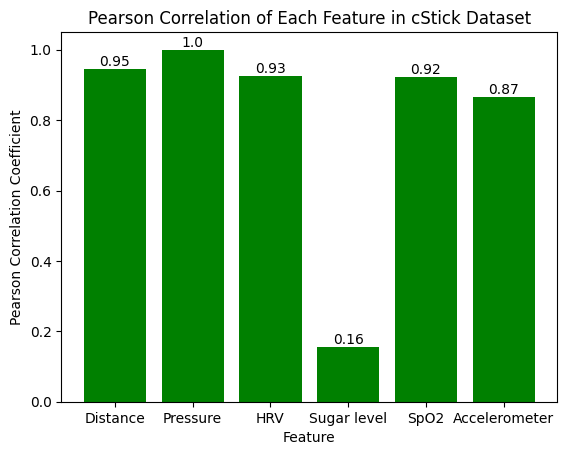

In [304]:
# PEASON CORRELATION FOR FEATURE RELEVANCE
regression_array = r_regression(X, y)

# plot feature relevances
plt.bar(X.columns, abs(regression_array), color='green')
for i in range(len(regression_array)):
    plt.text(i, abs(regression_array[i]), str(abs(round(regression_array[i], 2))), ha='center', va='bottom')

plt.xlabel('Feature')
plt.ylabel('Pearson Correlation Coefficient')
plt.title('Pearson Correlation of Each Feature in cStick Dataset')
plt.show()


# Data Preparation
## scaling to range [0,1]

In [305]:
# Scale Data using MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## KMEANS CLUSTERING MODEL

In [306]:

# DROPPING CERTAIN FEATURES TO SEE IMPACT ON CLUSTERING
# X = X.drop('Sugar level', axis=1)
# X = X.drop("Pressure", axis=1)

Number of iterations for convergence:  2
Adjusted_rand_score:  0.6445075071342274
Accuracy:  83.37420304070623
F1-Score:  0.8219673886138508


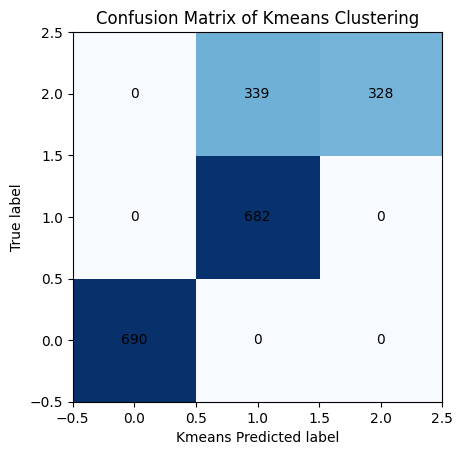

In [307]:
# K-MEANS CLUSTERING MODEL

# train and fit kmeans model
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=42, verbose=0)
y_pred = kmeans.fit_predict(X)

# number of iteration for convergence
print("Number of iterations for convergence: ", kmeans.n_iter_)

# Match Kmeans labels to true labels
k_labels = kmeans.labels_  # Get cluster labels
k_labels_matched = np.empty_like(k_labels)

# For each cluster label...
for k in np.unique(k_labels):

    # ...find and assign the best-matching truth label
    match_nums = [np.sum((k_labels==k)*(y==t)) for t in np.unique(y)]
    k_labels_matched[k_labels==k] = np.unique(y)[np.argmax(match_nums)]


# Evaluation metrics
print("Adjusted_rand_score: ",adjusted_rand_score(y, k_labels_matched))
print("Accuracy: ",accuracy_score(y, k_labels_matched)*100)
print("F1-Score: ",f1_score(y, k_labels_matched, average='weighted'))

# Plot confusion matrix
cm = confusion_matrix(y, k_labels_matched)
plt.imshow(cm,interpolation='none',cmap='Blues', origin='lower')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("Kmeans Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix of Kmeans Clustering")
plt.show()

# RANDOM FOREST CLASSIFIER

Decision Tree  1  :


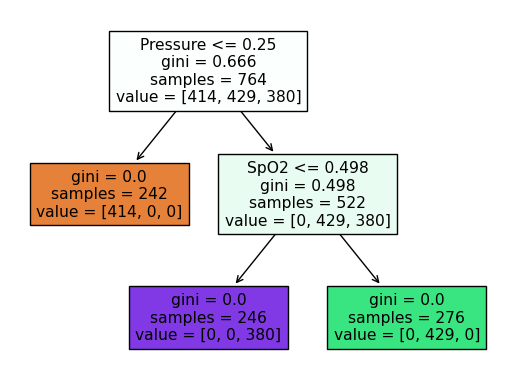

In [308]:
# RANDOM FOREST CLASSIFIER MODEL
# Creating training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# RANDOM FOREST CLASSIFIER
clf = RandomForestClassifier(max_depth=4, random_state=1, criterion='gini', n_estimators=1)
clf.fit(X_train, y_train)
y_pred_forest = clf.predict(X_test)

# VISUALIZING DECISION TREES
for i, estimator in enumerate(clf.estimators_):
    print("Decision Tree ", i+1, " :")
    sklearn.tree.plot_tree(estimator, filled=True, feature_names=X.columns)
    plt.show()


Test Accuracy: 1.0
F1 Score: 1.0


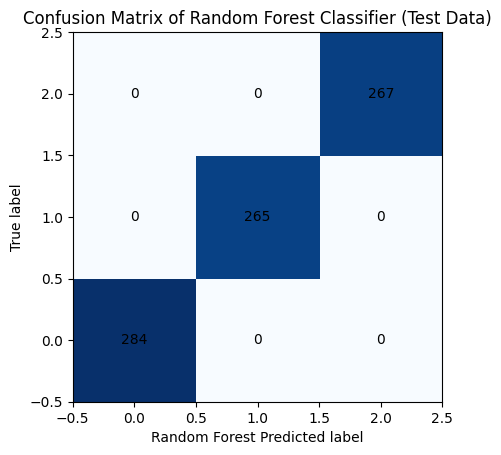

In [309]:
# EVALUATION
print('Test Accuracy:', accuracy_score(y_test, y_pred_forest))

print('F1 Score:', f1_score(y_test, y_pred_forest, average='weighted'))

# Visaualizing Confusion Matrix
cm = confusion_matrix(y_test, y_pred_forest)
plt.imshow(cm,interpolation='none',cmap='Blues', origin='lower')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("Random Forest Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix of Random Forest Classifier (Test Data)")
plt.show()

# LINEAR REGRESSION MODEL

In [310]:
# LINEAR REGRESSION MODEL

# Creating training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)


Test Accuracy: 1.0
F1 Score: 1.0


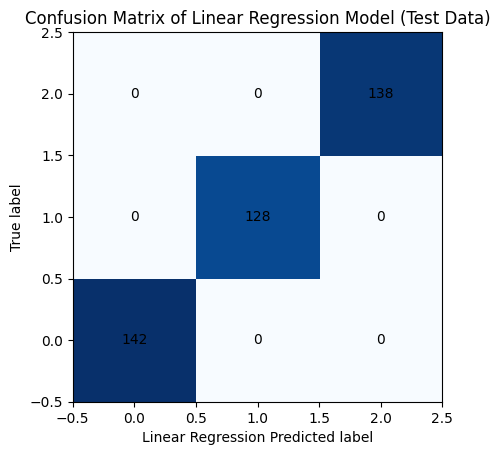

In [311]:
# EVALUATION
# Linear model

# EVALUATION
# round the predictions to the nearest integer
y_pred_linear = np.round(y_pred_linear)
print('Test Accuracy:', accuracy_score(y_test, y_pred_linear))
print('F1 Score:', f1_score(y_test, y_pred_linear, average='weighted'))

# Visaualizing Confusion Matrix
cm = confusion_matrix(y_test, y_pred_linear, labels=[0, 1, 2])
plt.imshow(cm,interpolation='none',cmap='Blues', origin='lower')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("Linear Regression Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix of Linear Regression Model (Test Data)")
plt.show()
